In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from prettytable import PrettyTable

# Configuración para visualizar los gráficos en el notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)

In [7]:
data = load_breast_cancer()
X=pd.DataFrame(data.data, columns=data.feature_names)
y=pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
depths=range(2,11)

table = PrettyTable()
table.field_names = ['Max Depth', 'Number of Features', 'Train Accuracy', 'Test Accuracy']

for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=depth, random_state=42)
    
    clf.fit(X_train, y_train)
    
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    table.add_row([depth, X_train.shape[1], round(train_accuracy,4), round(test_accuracy, 4)])
    
print(table)

+-----------+--------------------+----------------+---------------+
| Max Depth | Number of Features | Train Accuracy | Test Accuracy |
+-----------+--------------------+----------------+---------------+
|     2     |         30         |     0.9271     |     0.9181    |
|     3     |         30         |     0.9799     |     0.9708    |
|     4     |         30         |     0.9925     |     0.9591    |
|     5     |         30         |     0.9925     |     0.9532    |
|     6     |         30         |     0.9975     |     0.9532    |
|     7     |         30         |      1.0       |     0.9649    |
|     8     |         30         |      1.0       |     0.9649    |
|     9     |         30         |      1.0       |     0.9649    |
|     10    |         30         |      1.0       |     0.9649    |
+-----------+--------------------+----------------+---------------+


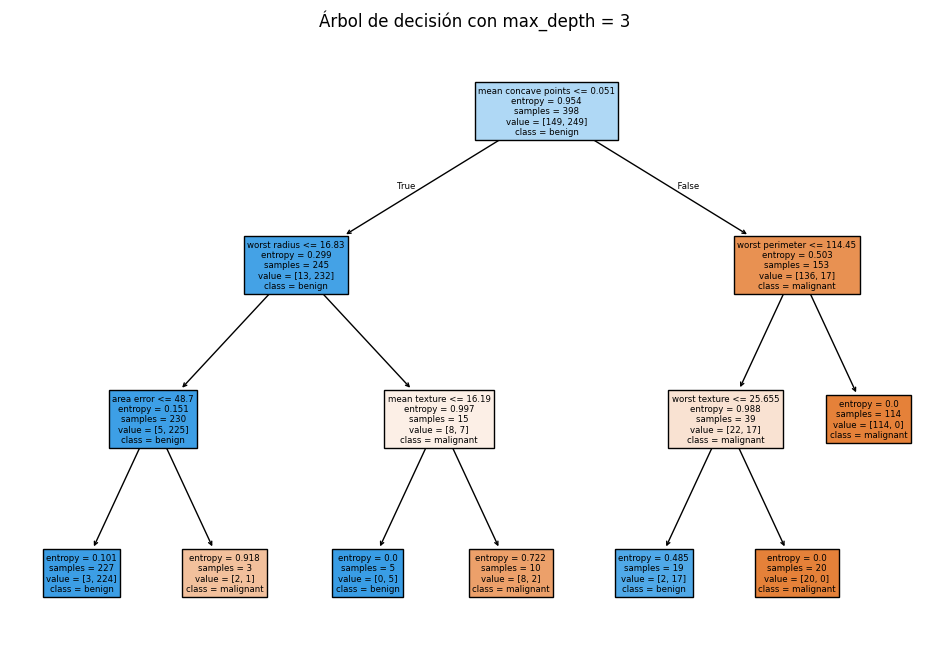

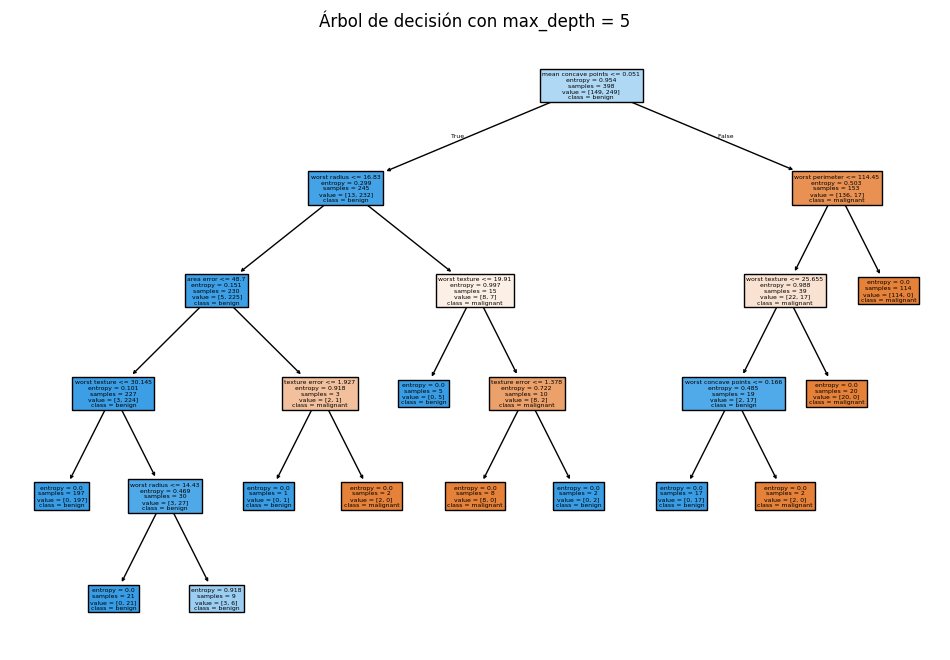

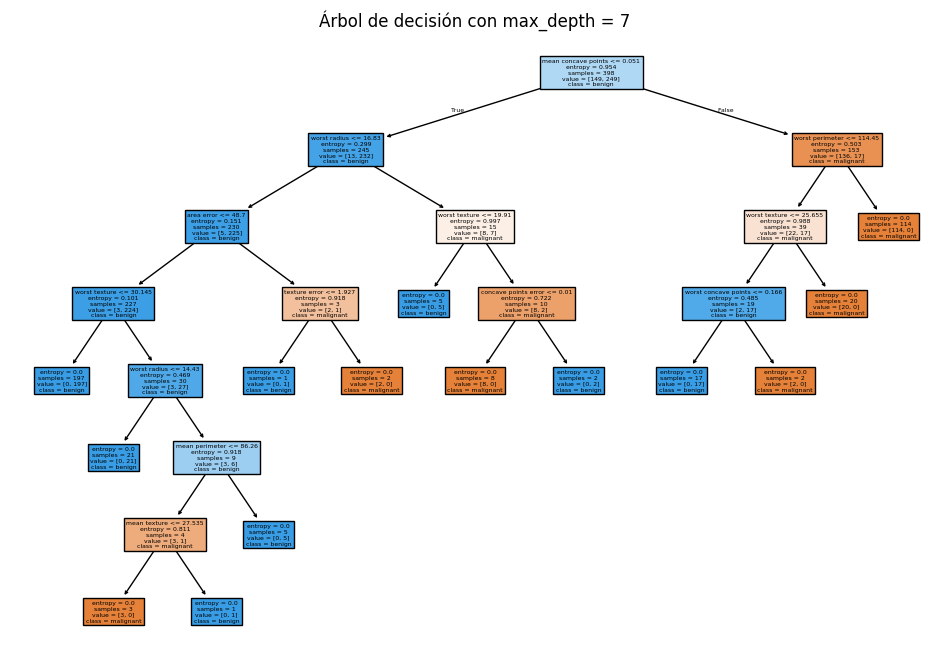

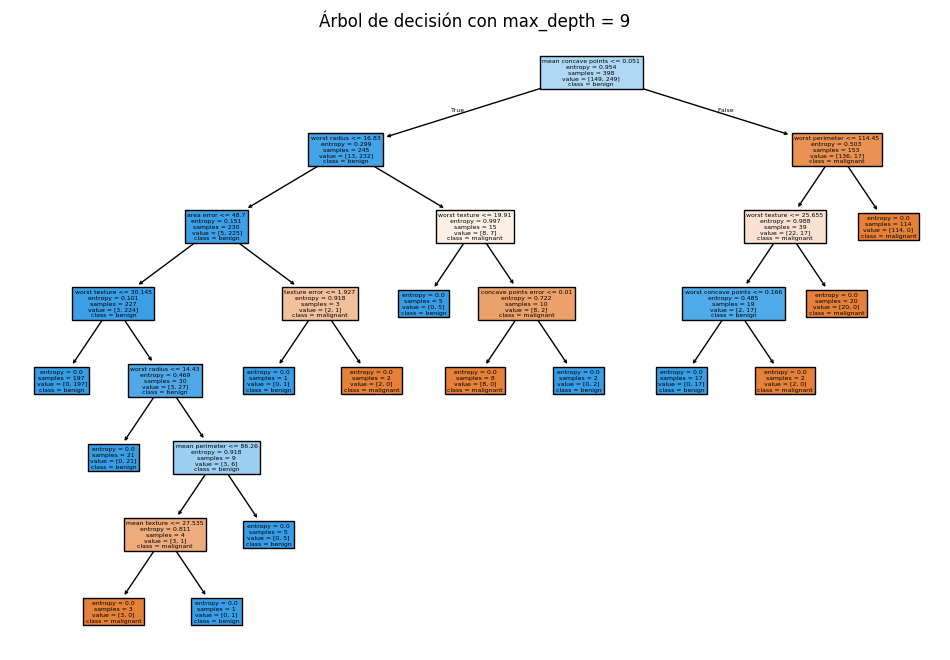

In [16]:
from sklearn.tree import plot_tree

for depth in range(3,10,2):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42, criterion='entropy', splitter='best')
    clf.fit(X_train, y_train)
    
    plt.figure()
    plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
    plt.title(f'Árbol de decisión con max_depth = {depth}')
    plt.show()